In [ ]:
#importing requires libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
plt.rcParams['figure.figsize']=(12,9)
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading dataset
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [ ]:
#checking first 5 rows of dataset
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
#the basic information about data like datatype,null values,number of columns,rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
#the summary statistics of data
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
#summary statistics of categorical values
df.describe(include='object')

,Fuel_Type
count,1436
unique,3
top,Petrol
freq,1264


In [ ]:
#checking unique values and there count
df.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,1264
Diesel,155
CNG,17


In [ ]:
#converting numerical values into categorical values with labelencoder
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])

In [ ]:
#checking the dataset whether it changes into numerical or not
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [ ]:
#checking the null values present or not there are no null values.If null values are there it gives count of that values
df.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
#checking the change in datatype or not after applying labelencoder
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Cylinders  1436 non-null   int64
 9   Gears      1436 non-null   int64
 10  Weight     1436 non-null   int64
dtypes: int64(11)
memory usage: 123.5 KB


In [ ]:
#renaming the column name because it has numbers,implementation will be hard
df.rename(columns={'Age_08_04':'Age'},inplace=True)

In [ ]:
#once again checking the datatypes
df.dtypes

,0
Price,int64
Age,int64
KM,int64
Fuel_Type,int64
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [ ]:
#if mean>median positive skewness is present
#most of the ouliers are present in price,km,cc,weight.so removal of ouliers should be done
df.describe()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,1.868384,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,0.371572,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,2.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,2.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


<Axes: >

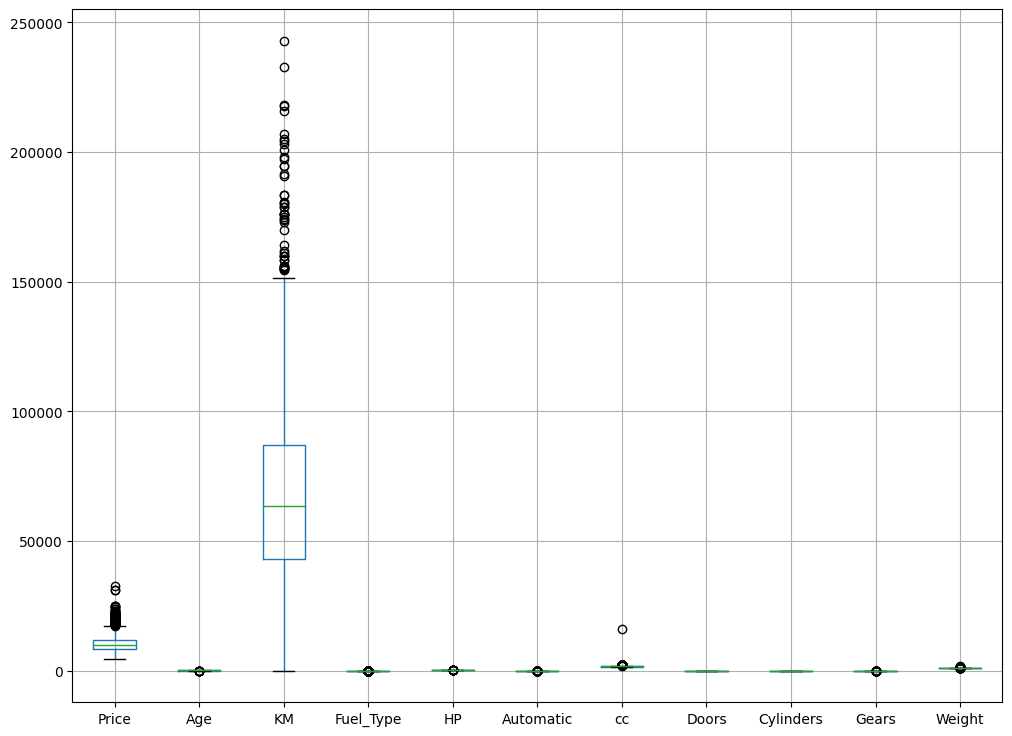

In [ ]:
#confriming with boxplot about outliers
df.boxplot()

In [ ]:
# Function to cap upper outliers using IQR
def cap_upper_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper bound (threshold for outliers)
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above the upper bound
    df[column] = df[column].apply(lambda x: min(x, upper_bound))

    return df

# List of numerical columns to cap outliers
columns_to_cap = ['Price', 'KM', 'HP', 'cc', 'Weight','Age','Fuel_Type','Gears']  # Add relevant numerical columns here

# Apply the capping function to each column
for col in columns_to_cap:
    df = cap_upper_outliers(df, col)

<Axes: >

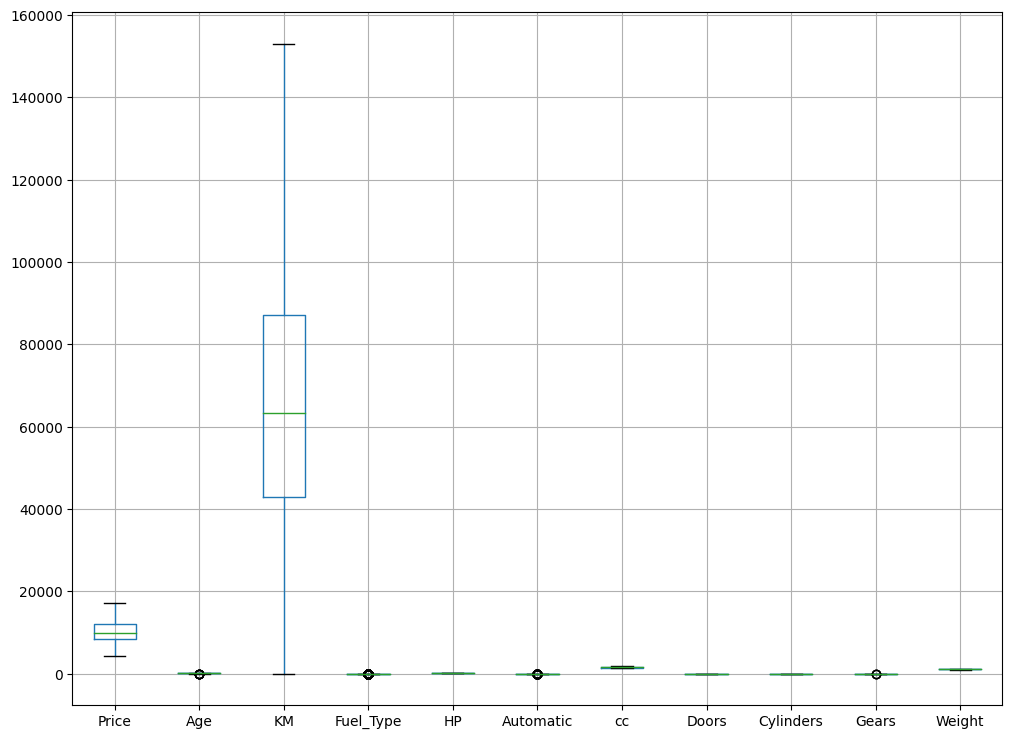

In [ ]:
#but still some are present.The ouliers are totally removed the model becomes overfitted
df.boxplot()

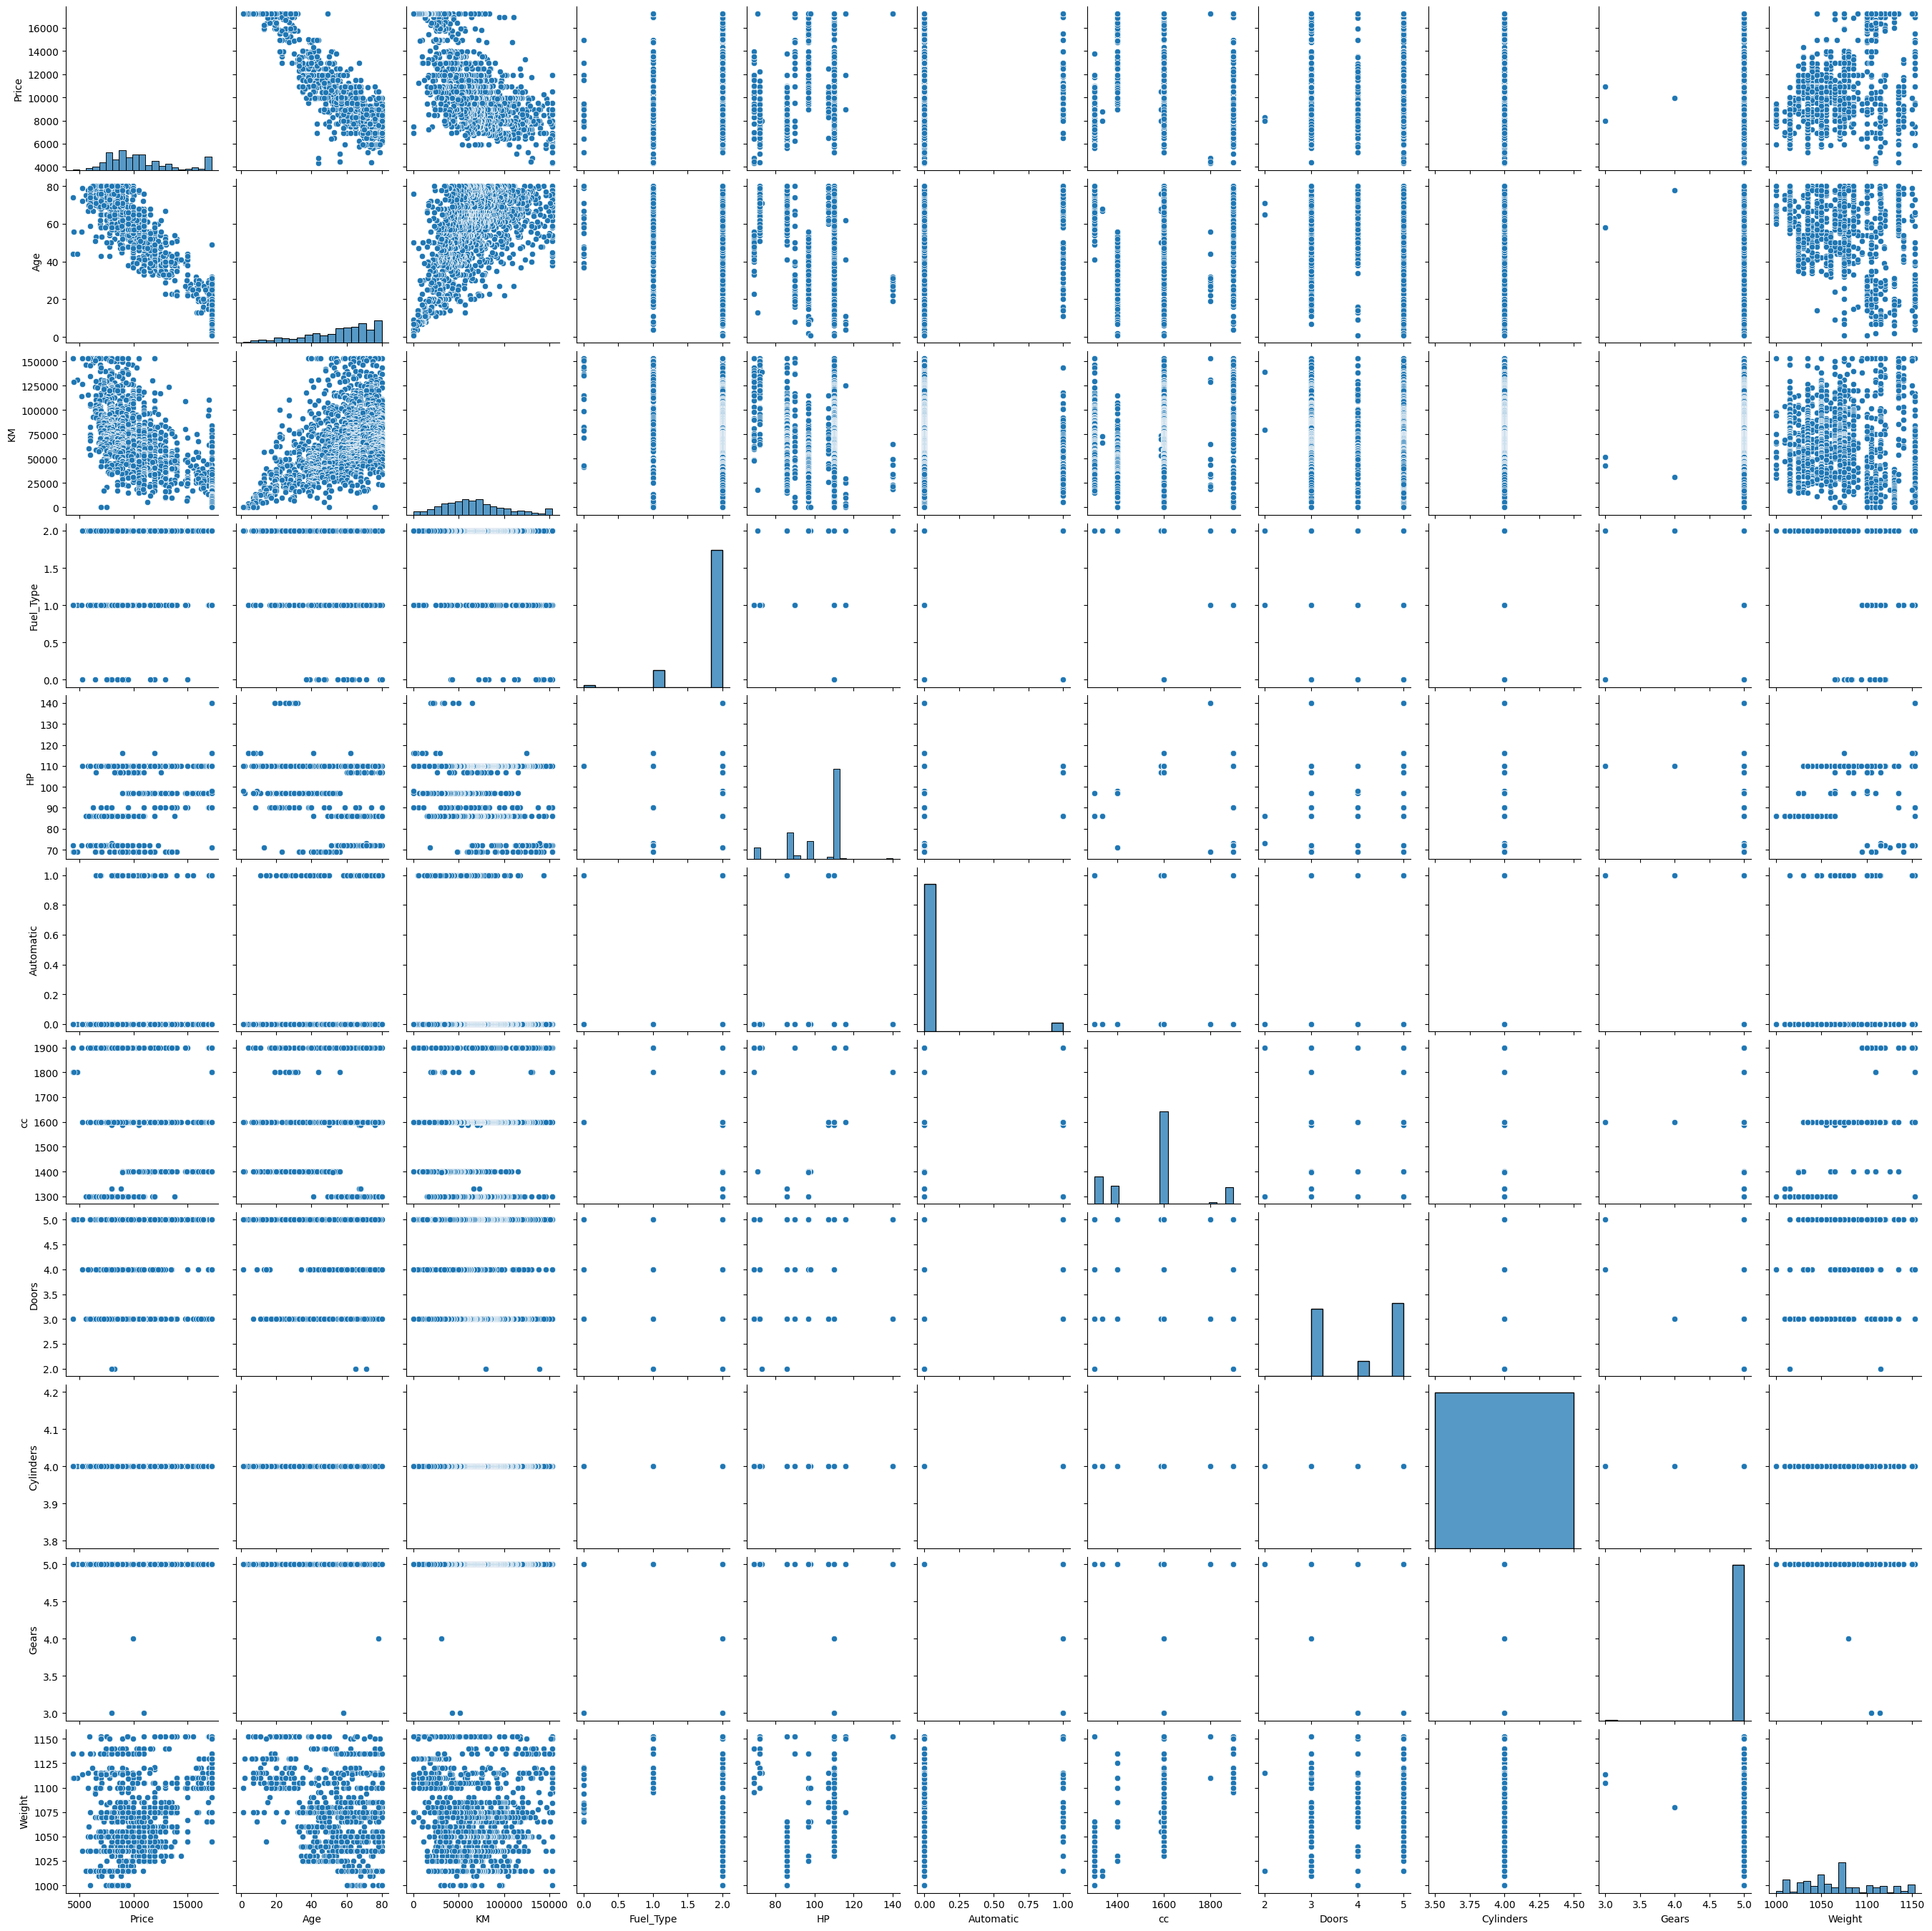

In [ ]:
sns.pairplot(df)

<Axes: >

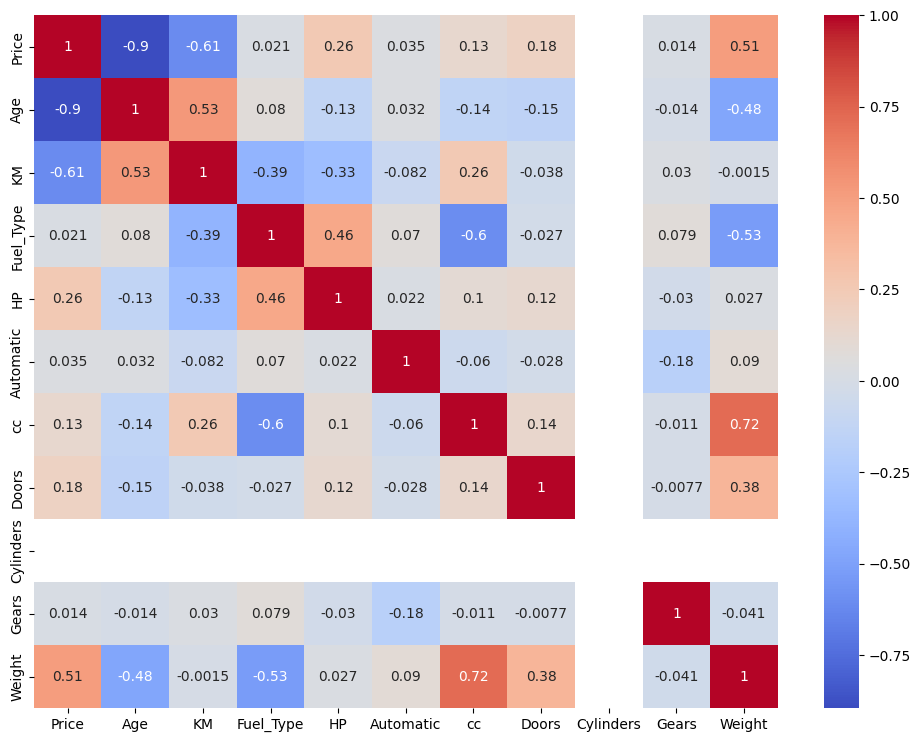

In [ ]:
#visulazig data with help of heatmap for correlation confrimation
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
df['Cylinders'].value_counts()

,count
Cylinders,
4,1436


By the above heatmap and cylinder value_counts the cylinder column has only one value or constant value so we can delete it because it has zero variance and no predicitive power and it may causes multi collinearity problem.

In [ ]:
#dropping the cylinder column
df=df.drop(columns='Cylinders')

In [ ]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500.0,23,46986.0,1,90.0,0,1900.0,3,5.0,1152.5
1,13750.0,23,72937.0,1,90.0,0,1900.0,3,5.0,1152.5
2,13950.0,24,41711.0,1,90.0,0,1900.0,3,5.0,1152.5
3,14950.0,26,48000.0,1,90.0,0,1900.0,3,5.0,1152.5
4,13750.0,30,38500.0,1,90.0,0,1900.0,3,5.0,1152.5


<Axes: >

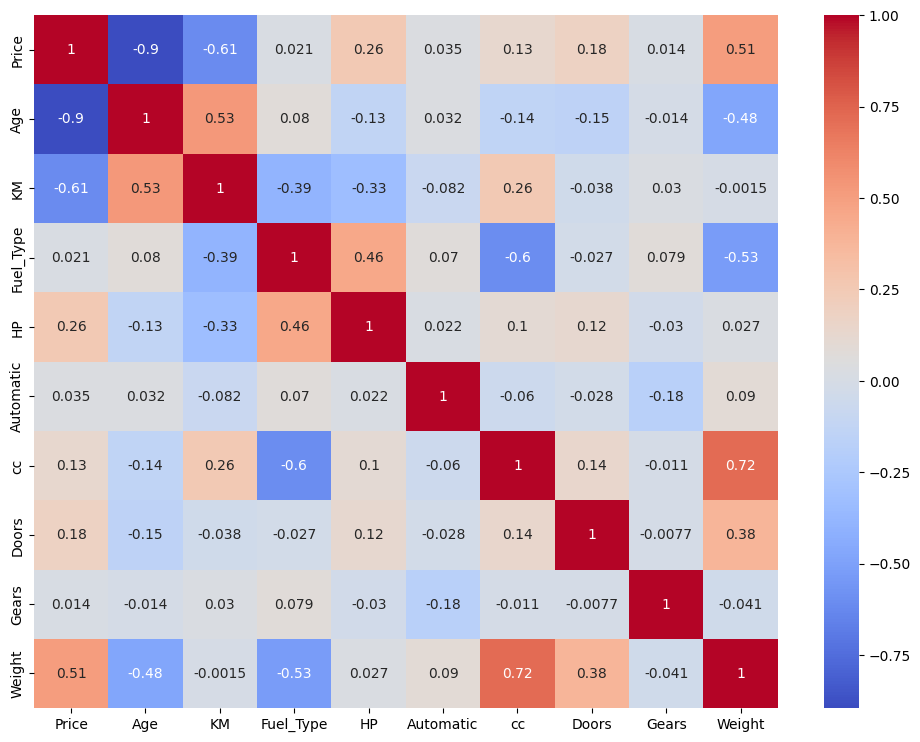

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
#cylinder column is deleted.

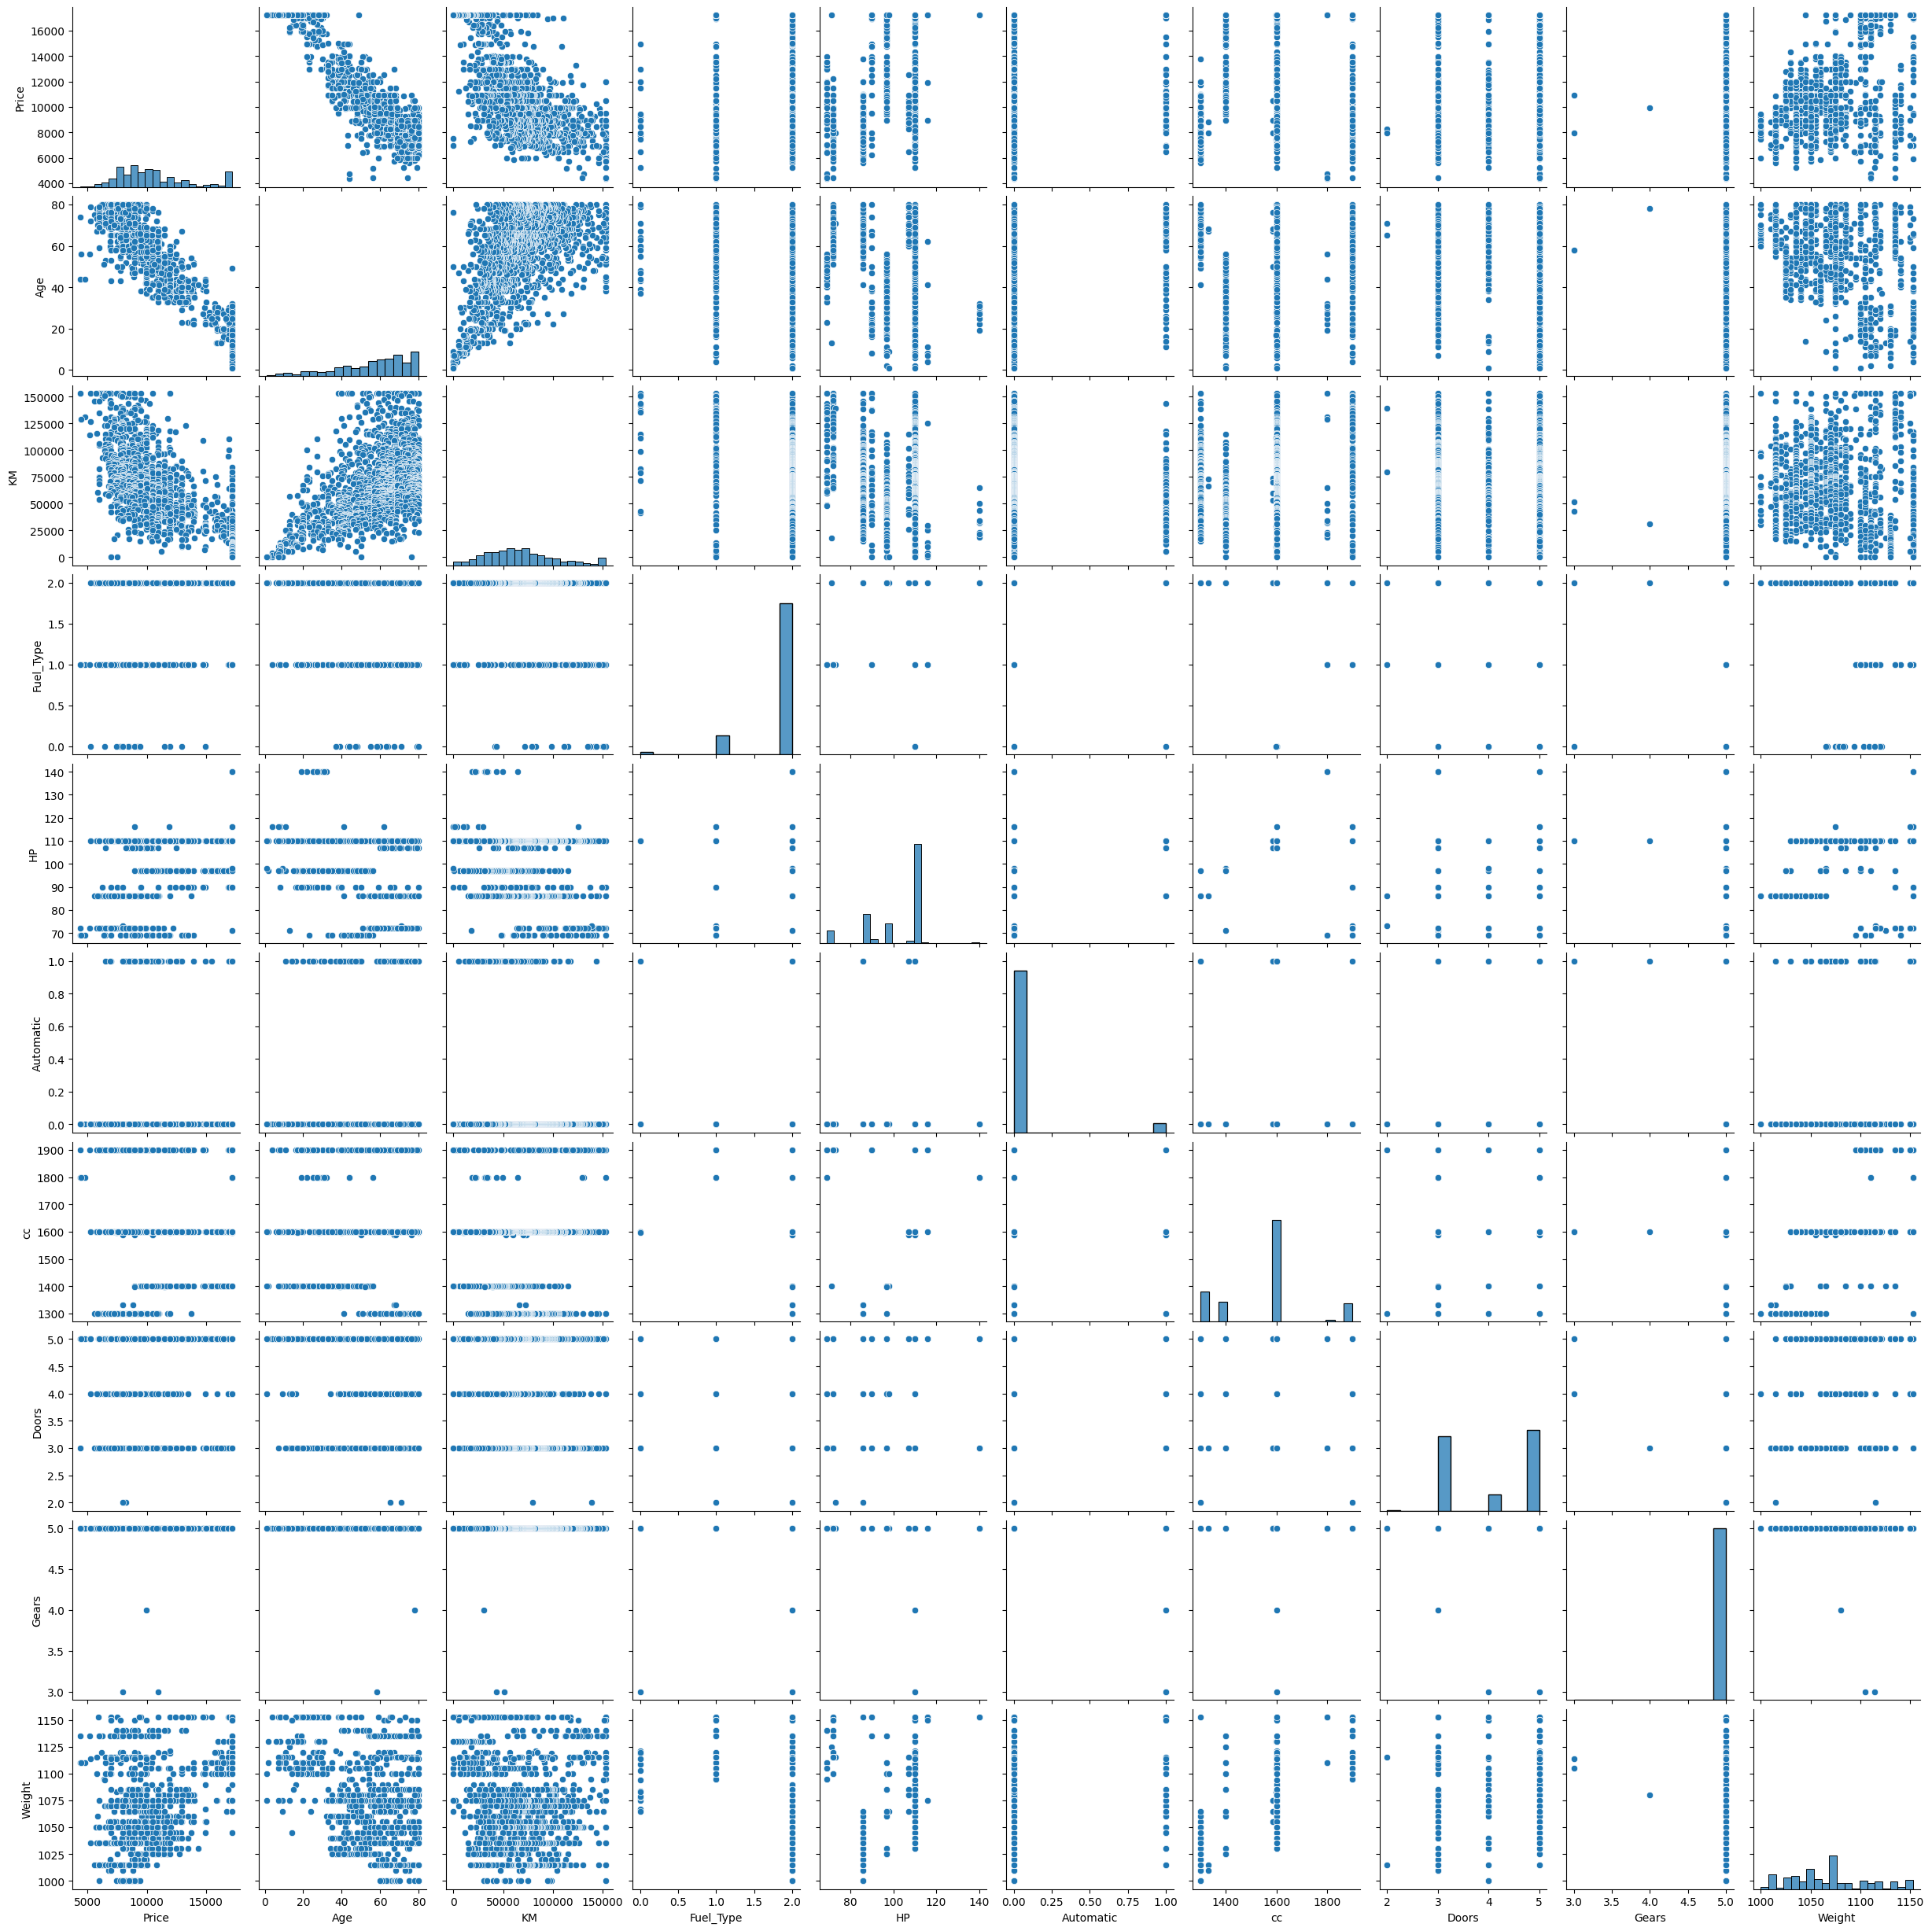

In [ ]:
#again checking collinearity problem it is one of the approach of collinearity
sns.pairplot(df)

# **VIF value**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.head(4)

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500.0,23,46986.0,1,90.0,0,1900.0,3,5.0,1152.5
1,13750.0,23,72937.0,1,90.0,0,1900.0,3,5.0,1152.5
2,13950.0,24,41711.0,1,90.0,0,1900.0,3,5.0,1152.5
3,14950.0,26,48000.0,1,90.0,0,1900.0,3,5.0,1152.5


In [ ]:
df1=df.drop(columns=['Price'])

In [ ]:
vif=pd.DataFrame()
vif

""


In [ ]:
vif['feature']=df1.columns
vif

,feature
0,Age
1,KM
2,Fuel_Type
3,HP
4,Automatic
5,cc
6,Doors
7,Gears
8,Weight


In [ ]:
[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

[19.555597304741582,
 9.712283937290133,
 78.14951161950911,
 111.76186852097729,
 1.2147431027004112,
 281.4415849312617,
 23.733168080956105,
 1723.9442194098183,
 2161.475820869612]

In [ ]:
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

In [ ]:
vif

,feature,VIF
0,Age,19.555597
1,KM,9.712284
2,Fuel_Type,78.149512
3,HP,111.761869
4,Automatic,1.214743
5,cc,281.441585
6,Doors,23.733168
7,Gears,1723.944219
8,Weight,2161.475821


Here weight and gears are not much important because vif values are more for that variables this may cause problem.And other variables are important.(If for suppose vif values all are same then no need to remove any variable we can build model).

# **Model Building by ols method**

In [ ]:
#Consider Gears and exclude Weights
gears=smf.ols('Price~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Gears',data=df).fit()
gears.rsquared,gears.aic

(0.843178246746342, 24408.616545416648)

In [ ]:
#Consider Weight and exclude gears
weight=smf.ols('Price~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Weight',data=df).fit()
weight.rsquared,weight.aic
#this model we can consider because it has high rsquared value and low aic value but lets try another way  to build model i.e., with the help of train_test_split

(0.8657878166954255, 24185.04882774283)

# **By train_test_split**

# **Model-1**

In [ ]:
from sklearn.model_selection import train_test_split

# Defining independent (X) and dependent variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Spliting data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model
mlr1 = LinearRegression()

# Fit the model on the training data
mlr1.fit(X_train, y_train)

# Coefficients of the model
print("Intercept:", mlr1.intercept_)
print("Coefficients:", pd.DataFrame(mlr1.coef_, X.columns, columns=['Coefficient']))

# predictings on the test set
y_pred = mlr1.predict(X_test)


Intercept: -12852.444766555544
Coefficients:            Coefficient
Age        -106.206061
KM           -0.014648
Fuel_Type   560.472855
HP           20.013878
Automatic    12.933545
cc           -1.897107
Doors      -102.616939
Gears       706.927618
Weight       25.324705


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1184887.2591519584
Root Mean Squared Error: 1088.5252680355925
R-squared: 0.8620890614587309


# **Model-2**

In [ ]:
dw=df.drop(columns=['Weight'])

In [ ]:
dw.head(2)

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears
0,13500.0,23,46986.0,1,90.0,0,1900.0,3,5.0
1,13750.0,23,72937.0,1,90.0,0,1900.0,3,5.0


In [ ]:
# Defining independent (X) and dependent variable (y)
X = dw.drop('Price', axis=1)
y = dw['Price']

# Spliting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Instantiate the linear regression model
mlr2 = LinearRegression()

# Fitting the model on the training data
mlr2.fit(X_train, y_train)

# Coefficients of the model
print("Intercept:", mlr2.intercept_)
print("Coefficients:", pd.DataFrame(mlr2.coef_, X.columns, columns=['Coefficient']))

# Make predictions on the test set
y_pred = mlr2.predict(X_test)

Intercept: 10199.22136862695
Coefficients:            Coefficient
Age        -124.683731
KM           -0.014791
Fuel_Type   157.865761
HP           16.358433
Automatic   678.978064
cc            1.308358
Doors       146.794726
Gears       735.519684


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1343426.5975298139
Root Mean Squared Error: 1159.0628100020351
R-squared: 0.8436364122446187


# **Model-3**

In [ ]:
dg=df.drop(columns=['Gears'])

In [ ]:
dg.head(2)

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Weight
0,13500.0,23,46986.0,1,90.0,0,1900.0,3,1152.5
1,13750.0,23,72937.0,1,90.0,0,1900.0,3,1152.5


In [ ]:
# Define independent (X) and dependent variable (y)
X = dg.drop('Price', axis=1)
y = dg['Price']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Instantiate the linear regression model
mlr3 = LinearRegression()

# Fit the model on the training data
mlr3.fit(X_train, y_train)

# Coefficients of the model
print("Intercept:", mlr3.intercept_)
print("Coefficients:", pd.DataFrame(mlr3.coef_, X.columns, columns=['Coefficient']))

# Make predictions on the test set
y_pred = mlr3.predict(X_test)

Intercept: -9403.626016237084
Coefficients:            Coefficient
Age        -106.479171
KM           -0.014469
Fuel_Type   602.864591
HP           19.405899
Automatic   -41.432234
cc           -1.860218
Doors      -103.730818
Weight       25.341990


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1185688.1651046723
Root Mean Squared Error: 1088.8930916782751
R-squared: 0.8619958427235568


# **Model-4**

In [ ]:
data=df.drop(columns=['Weight','Gears'])

In [ ]:
data.head(2)

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors
0,13500.0,23,46986.0,1,90.0,0,1900.0,3
1,13750.0,23,72937.0,1,90.0,0,1900.0,3


In [ ]:
# Defining independent (X) and dependent variable (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Spliting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Instantiate the linear regression model
mlr4 = LinearRegression()

# Fit the model on the training data
mlr4.fit(X_train, y_train)

# Coefficients of the model
print("Intercept:", mlr4.intercept_)
print("Coefficients:", pd.DataFrame(mlr4.coef_, X.columns, columns=['Coefficient']))

# Make predictions on the test set
y_pred = mlr4.predict(X_test)

Intercept: 13803.998791700194
Coefficients:            Coefficient
Age        -124.981017
KM           -0.014605
Fuel_Type   201.687358
HP           15.723251
Automatic   622.884867
cc            1.349017
Doors       145.812885


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1343656.9501961449
Root Mean Squared Error: 1159.1621759685506
R-squared: 0.8436096011263762


In [ ]:
# Let's assume new_data is your new input.Giving new data to last model because it has no multicollinearity between variables
new_data = pd.DataFrame({
    'Age': [30],
    'KM': [50000],
    'Fuel_Type': [1],
    'HP': [90],
    'Automatic': [0],
    'cc': [1600],
    'Doors': [4],
})

# Predict the price using the trained model
new_predictions = mlr4.predict(new_data)
new_predictions

array([13682.7723861])

# **Lasso&Ridge methods**

In [374]:
for i in range(100,200): # try 50 to 100, 100 to 200
  mlr1 = Lasso(alpha = i)
  mlr4.fit(X_train,y_train)
  print(f"Alpha: {i} Train: {mlr4.score( X_test, y_test)} Test: {mlr4.score(X_test,y_test)}")

Alpha: 100 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 101 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 102 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 103 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 104 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 105 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 106 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 107 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 108 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 109 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 110 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 111 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 112 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 113 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 114 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 115 Train: 0.8427887460899792 Test: 0.8427887460899792
Alpha: 1

In [ ]:
mlr4 = Lasso(alpha = 100) # select any value where train and test accuracy is same
mlr4.fit(X_train,y_train)
mlr4.score(X_train,y_train),mlr4.score(X_test,y_test)

(0.8386699833772889, 0.8409150577583675)

In [ ]:
mlr4.coef_# check columns whose slope is 0. They are not important in model building

array([-1.23829130e+02, -1.56958342e-02,  0.00000000e+00,  1.83438121e+01,
        0.00000000e+00,  1.15238614e+00,  3.35730652e+01])

In [ ]:
for i in range(100,200):
  mlr4 = Ridge(alpha = i)
  mlr4.fit(X_train,y_train)
  print(f"Alpha: {i} Train: {mlr4.score(X_train,y_train)} Test: {mlr4.score(X_test,y_test)}")

Alpha: 100 Train: 0.841482292841869 Test: 0.8428951477909631
Alpha: 101 Train: 0.8414745434463627 Test: 0.8428893971449246
Alpha: 102 Train: 0.8414668553003939 Test: 0.8428836947525236
Alpha: 103 Train: 0.8414592277582467 Test: 0.8428780401138065
Alpha: 104 Train: 0.8414516601780843 Test: 0.8428724327308403
Alpha: 105 Train: 0.8414441519221884 Test: 0.8428668721079615
Alpha: 106 Train: 0.8414367023571772 Test: 0.8428613577520068
Alpha: 107 Train: 0.8414293108542044 Test: 0.8428558891725246
Alpha: 108 Train: 0.8414219767891382 Test: 0.8428504658819683
Alpha: 109 Train: 0.8414146995427245 Test: 0.8428450873958733
Alpha: 110 Train: 0.8414074785007324 Test: 0.8428397532330182
Alpha: 111 Train: 0.8414003130540857 Test: 0.8428344629155728
Alpha: 112 Train: 0.8413932025989798 Test: 0.842829215969231
Alpha: 113 Train: 0.8413861465369851 Test: 0.8428240119233317
Alpha: 114 Train: 0.8413791442751395 Test: 0.8428188503109684
Alpha: 115 Train: 0.8413721952260274 Test: 0.8428137306690873
Alpha: 116

In [ ]:
mlr4 = Ridge(alpha = 120)
mlr4.fit(X_train,y_train)
mlr4.score(X_train,y_train),mlr4.score(X_test,y_test)

(0.8413382280081682, 0.8427887460899792)

In [ ]:
mlr4.coef_

array([-1.24077090e+02, -1.52581911e-02,  7.41605559e+01,  1.74148809e+01,
        2.08689329e+02,  1.18948242e+00,  1.30561093e+02])

# **Interview Questions**

**Standardization:**Standardization is scaling technique where the values are centered around the mean with a unit standard deviation.Z score for scaling. Scale values in such a way that the mean=0 and std=1.

**Normalization:** Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.It is also Min-Max scaling.




**Techniques to address multicollinearity in multiple linear regression:**

**Variance Inflation Factor (VIF):** Check VIF values for the features, and remove features with high multicollinearity.

**Lasso and Ridge Regularization:** These techniques penalize large coefficients, which helps mitigate the effect of multicollinearity.

-And also scatterplot and correlation matrix are used to address multi coliinearity.
-To remove them subset selection is used.Best subset is selected by rsquared value and aic(akaike information criteria).The model which gives high rsquared and less AIC value that model will be selected.